In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df=pd.read_csv('files_for_lab/customer_value_analysis.csv')

First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:


display(customer_df.shape)

(9134, 24)

In [5]:

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [6]:
#create functiuon to replace spaces with _ and lowercase column names
def clean_columns(df):
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()
    return df

In [7]:
customer_df=clean_columns(customer_df)

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Change the type of effective_to_date column to DateTime format.

In [9]:

customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

check for Nan per columns

In [10]:

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [11]:
def split_categorical_numerical(df:pd.DataFrame):
    '''
    The function takes a dataframe as input and returns two dataframes
    one with categorical variables and one with numerical variables

    '''
    categorical_df=df.select_dtypes(include='object')
    numerical_df=df.select_dtypes(include=np.number)
    return categorical_df, numerical_df

#call function
categorical_df, numerical_df=split_categorical_numerical(customer_df)

In [12]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Drop any ID column

In [14]:
#drop customer id
categorical_df=categorical_df.drop(['customer'], axis=1)

Get the correlation matrix for the numerical variables

In [15]:
#get correlation matrix for numerical variables
corr_matrix=numerical_df.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


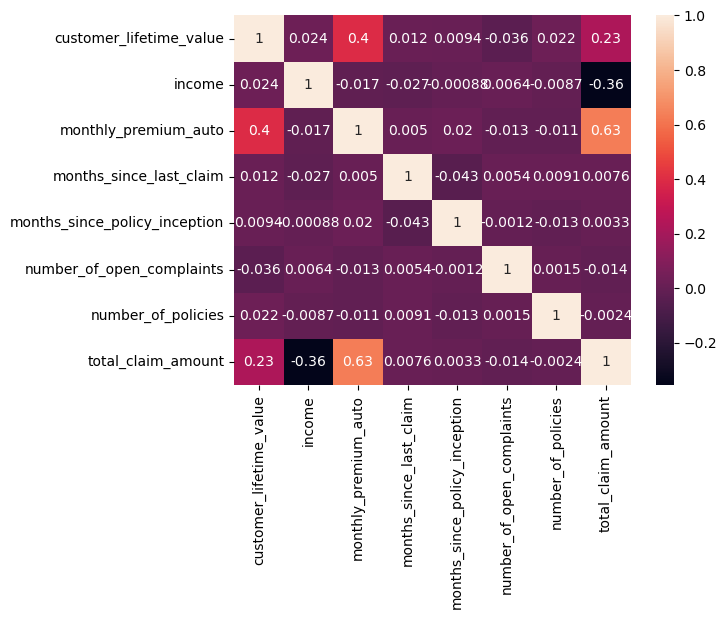

In [16]:
#show heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


Monthly premium auto and total claim amount shows highest correlation. it makes sense because higher premium would be paid for more luxirious autos or autos with high risk factors, such as neigbourhood or usage.  and so claims coming from  those area will be considerably higher than normal

Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [17]:

def split_continuous_discrete(df:pd.DataFrame, unique_values=36):
    '''
    The function takes a dataframe as input and returns two dataframes
    one with numerical continuous variables and one with numerical discrete variables

    '''
    continuous_df=df.copy()
    discrete_df=df.copy()
    for col in df.columns:
        if len(df[col].unique()) > unique_values:
            discrete_df.drop(col, axis=1, inplace=True)
    for col in df.columns:
        if len(df[col].unique()) <= unique_values:
            continuous_df.drop(col, axis=1, inplace=True)
    return continuous_df, discrete_df

   

In [18]:
#call function
continuous_df, discrete_df=split_continuous_discrete(numerical_df)

In [19]:
#show continuous df
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [20]:
#show discrete df
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

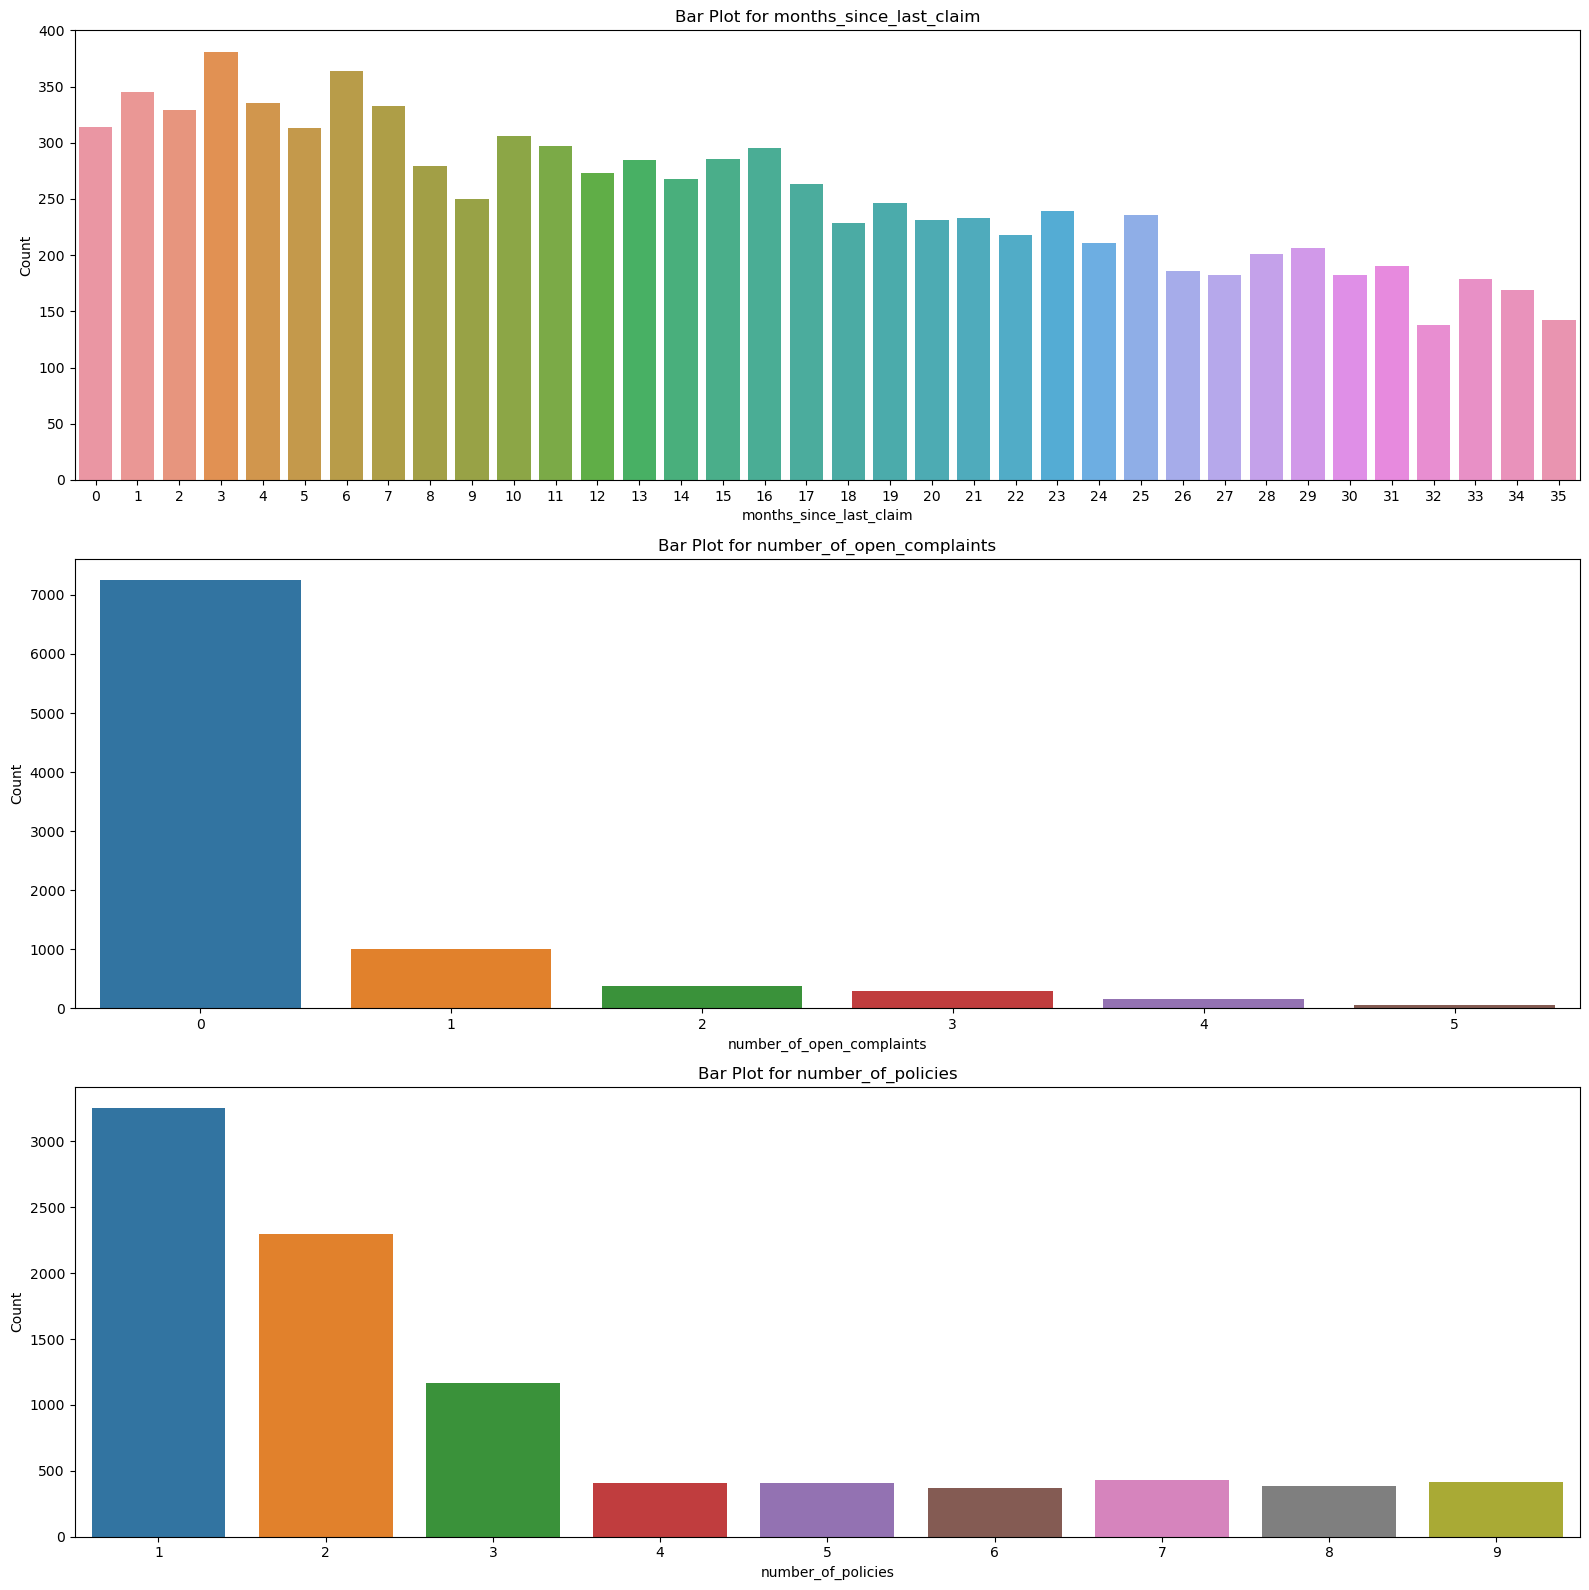

In [21]:
#Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
def plot_discrete(df:pd.DataFrame):
    '''
    The function takes a dataframe as input and plots a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

    '''
    plt.figure(figsize=(16,16))
    columns=df.columns
    for column in columns:
        plt.subplot(len(columns), 1, columns.get_loc(column) + 1)  # Create subplots for each column
        sns.countplot(data=df, x=column)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

#call function
plot_discrete(discrete_df)

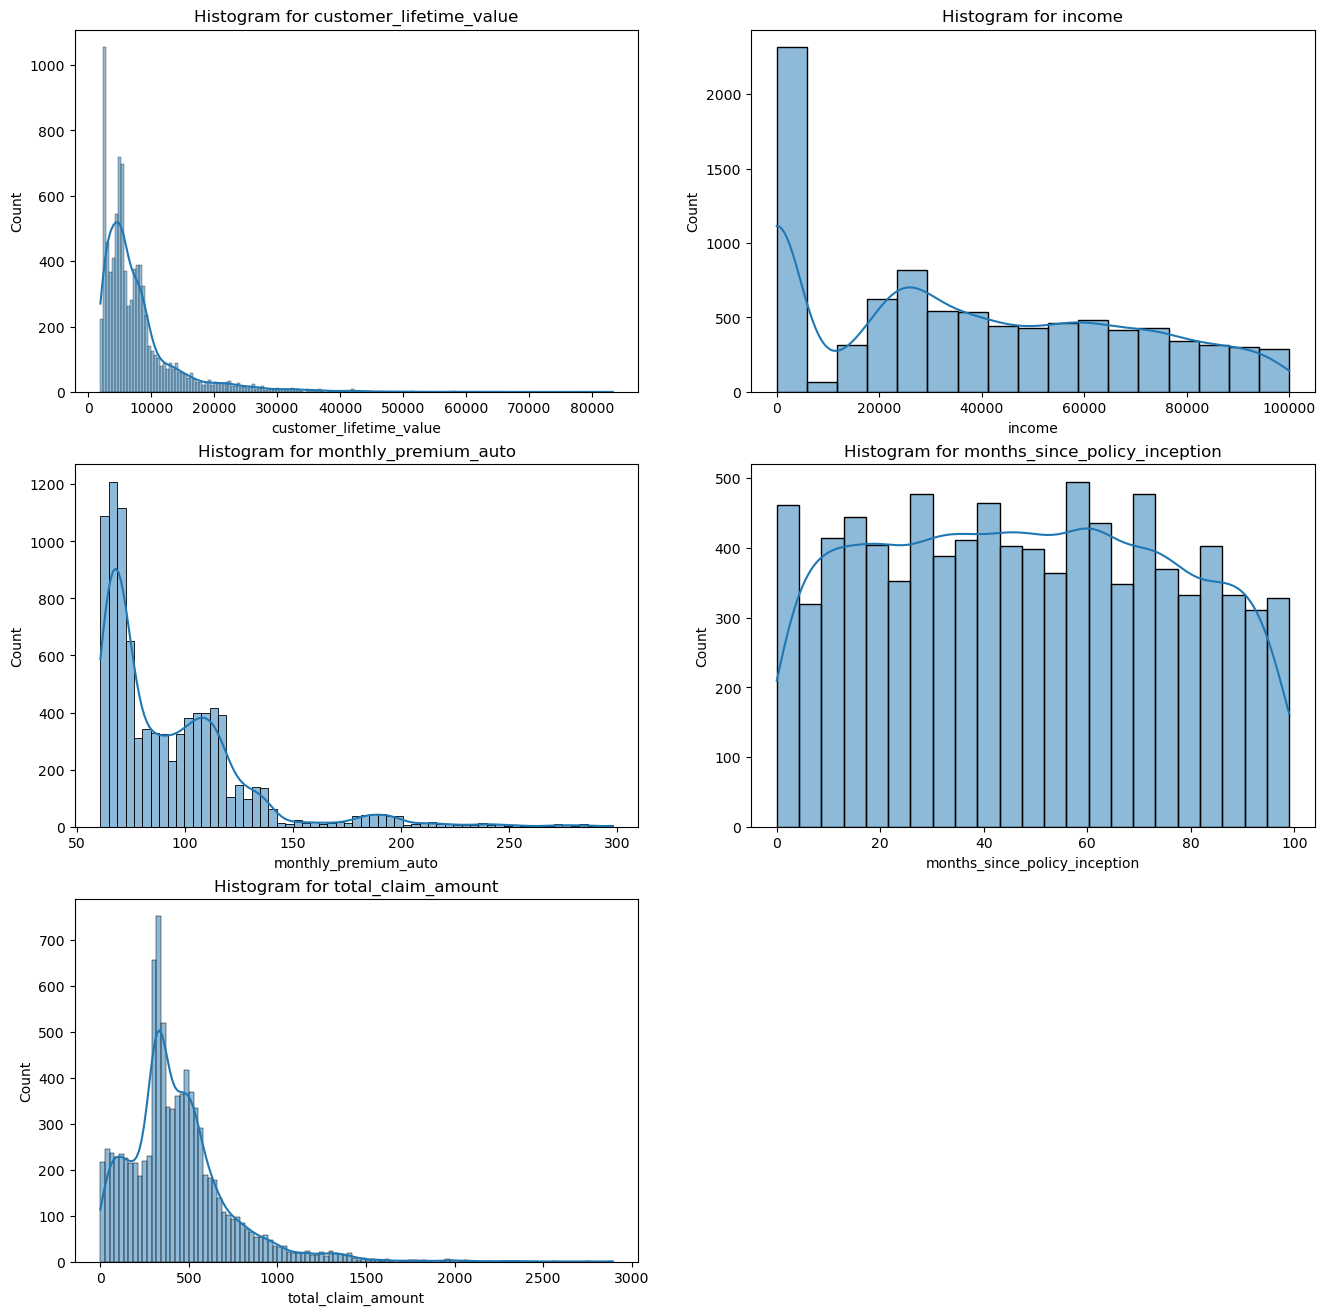

In [22]:
def continuous_histograms(df: pd.DataFrame):
    '''
    Create histograms for all the columns in the continuous_df using seaborn.
    Parameters:
     df (pd.DataFrame): The DataFrame containing continuous columns.
    
    '''

    num_cols = df.shape[1]
    num_rows = math.ceil(num_cols / 2) 

    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
   
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram for {col}')
    
    # Hide any empty subplots (if num_cols is odd)
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])
    plt.show()

# Call the function to create histograms
continuous_histograms(continuous_df)








According to the previous histogram plots, do you think that you will have to apply any transformation?

We might need to do a transform to address skewness as the histogram looks heavily skewed . and make the distribution more symetrical

##Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

we will use a boxplot to spot and identify outliers

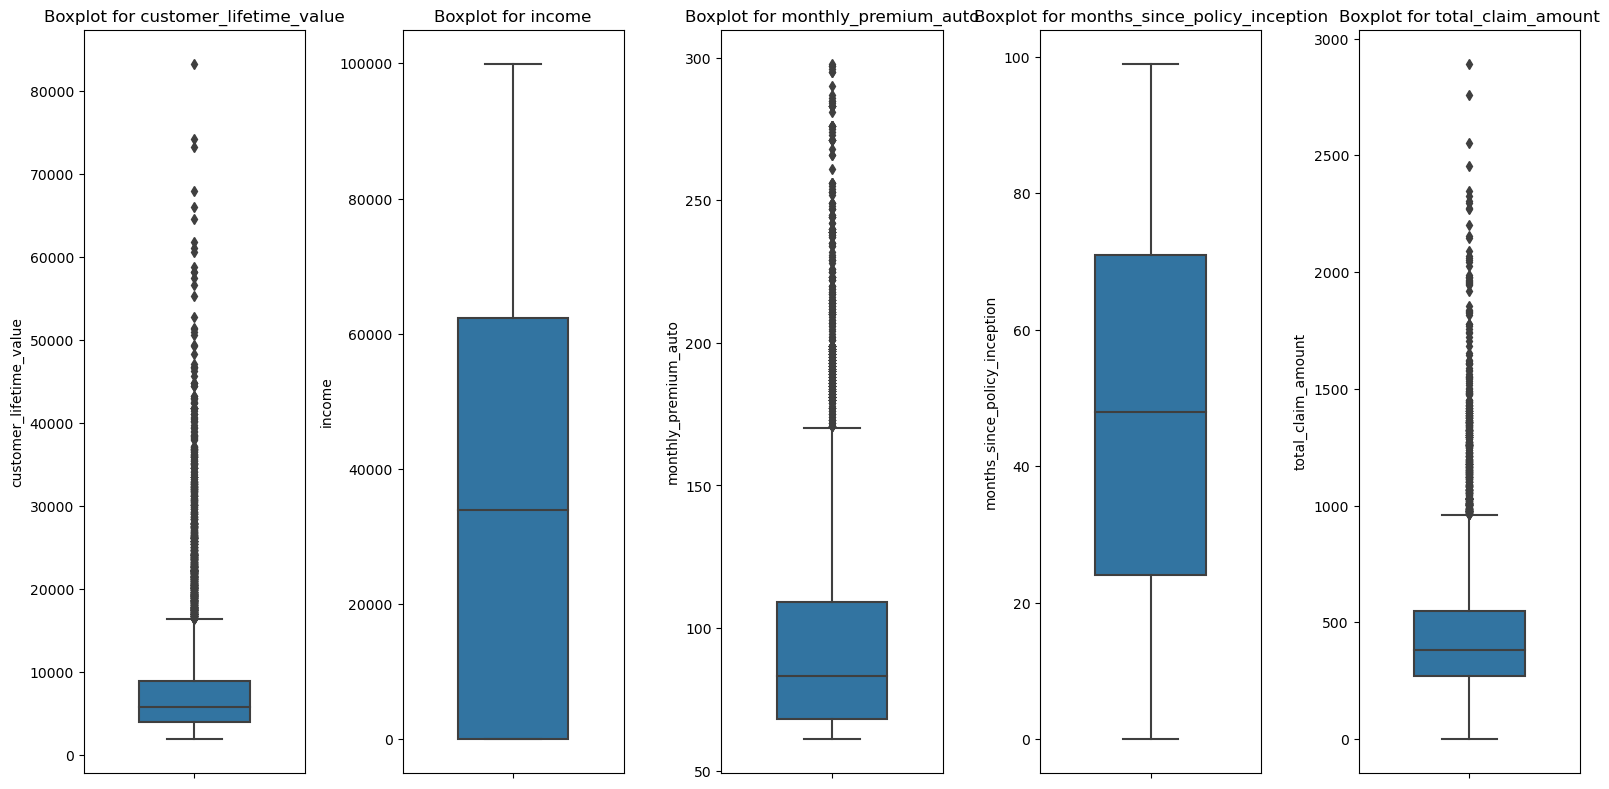

In [23]:
#define a boxplot function for continuous variables

def continuous_boxplots(df: pd.DataFrame):
    '''
    Create boxplots for all the columns in the continuous_df using seaborn.
    Parameters:
     df (pd.DataFrame): The DataFrame containing continuous columns.
    
    '''

    plt.figure(figsize=(16, 8))

    # Create boxplots for all columns in the DataFrame
    for i, column in enumerate(df.columns):
        plt.subplot(1, len(df.columns), i + 1)
        sns.boxplot(y=df[column], width=0.5)
        plt.title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()
# Call the function to create boxplots
continuous_boxplots(continuous_df)

we can see some outliers in customer_lifetime_value and total_claim_amount

Lab Cleaning Categorical Data

Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [24]:
#define function that takes a pd.DataFrame and create seaborn countplots for all categorical columns
#sort by frequency use value_counts() , if unique values >6, place bars horizontally
def categorical_countplots(df:pd.DataFrame):
    '''
    Create countplots for all the columns in the categorical_df using seaborn.
    Parameters:
     df (pd.DataFrame): The DataFrame containing categorical columns.
    condition:sort frequency by desc, if unique values >6, place bars horizontally
        
    '''
    plt.figure(figsize=(16, 8))
    
    for column in enumerate(df.columns):
        # Check the cardinality of the column
        unique_count = len(df[column].unique())
        
        if unique_count > 6:
            # For high cardinality, place bars on the y-axis
            sns.countplot(data=df, y=column, order=df[column].value_counts().index)
        else:
            # For low cardinality, place bars on the x-axis
            sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        
    plt.title(f'Countplot for {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()


In [25]:
def countplots( df : pd.DataFrame):
    '''
    Create countplots for all the columns in the categorical_df using seaborn.

    Parameters:
        df (pd.DataFrame): The DataFrame containing categorical columns.

    Condition:
        Sort frequency by descending order, and if the number of unique values > 6, place bars horizontally.
    '''	
    columns = df.columns
    for column in columns:
        plt.figure(figsize=(8, 3))  # Create a new figure for each countplot
        unique_values = df[column].value_counts().index  # Get unique values sorted by frequency
        
        if len(unique_values) > 6:
            sns.countplot(data=df, y=column, order=unique_values)
        else:
            sns.countplot(data=df, x=column, order=unique_values)
        
        plt.title(f'Countplot for {column}')
        plt.xlabel('Frequency')
        plt.tight_layout()  # Ensure proper spacing within each plot
        plt.show()

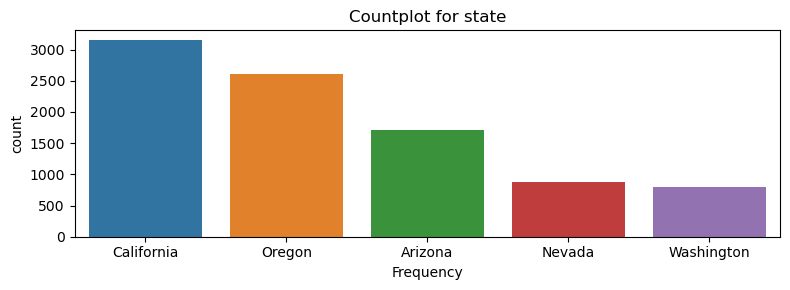

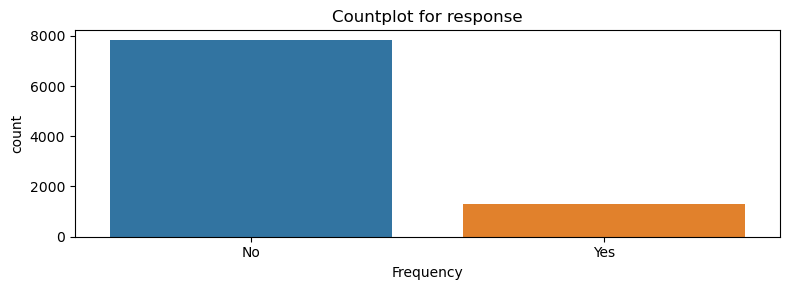

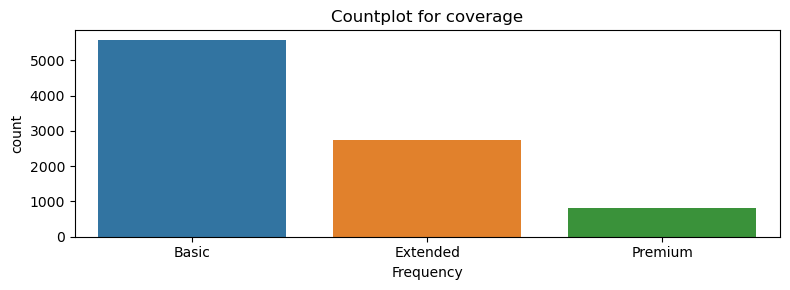

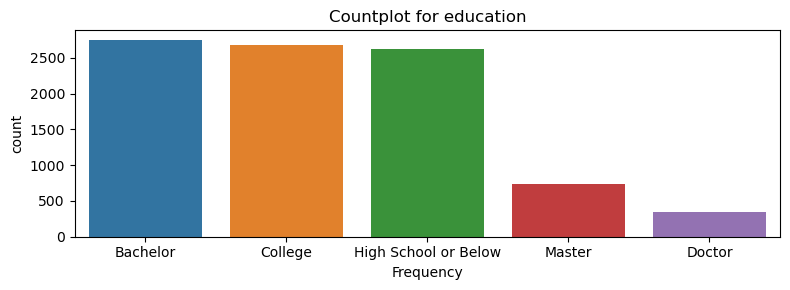

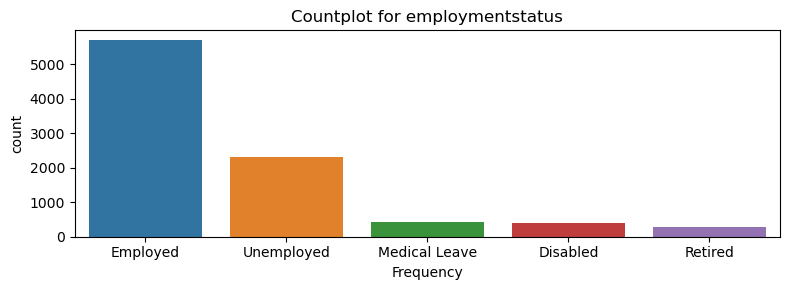

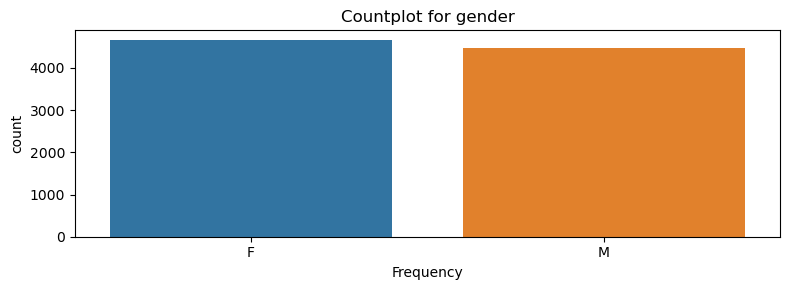

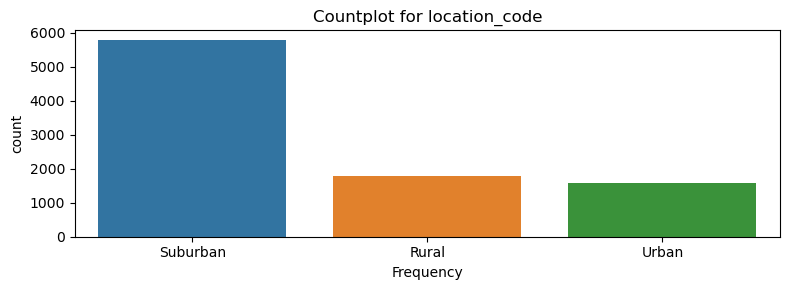

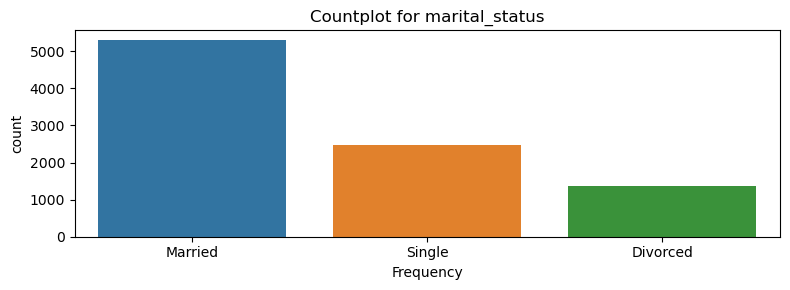

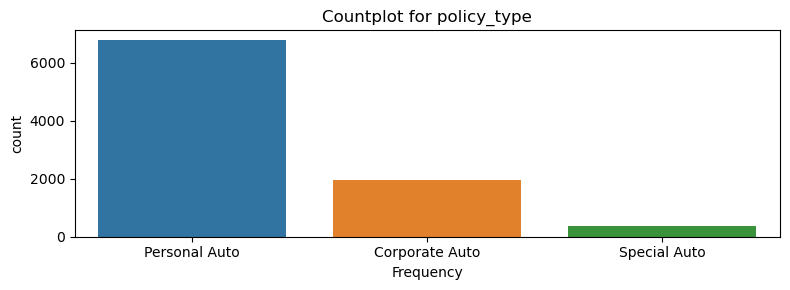

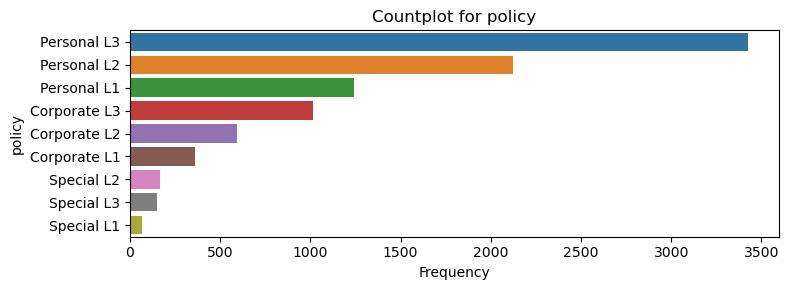

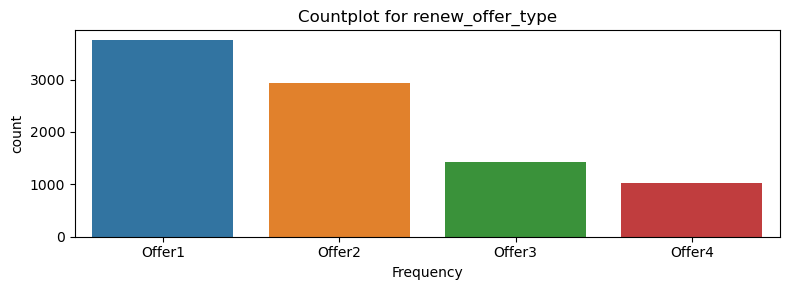

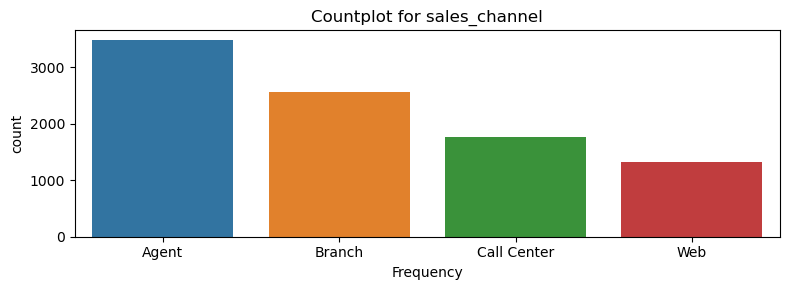

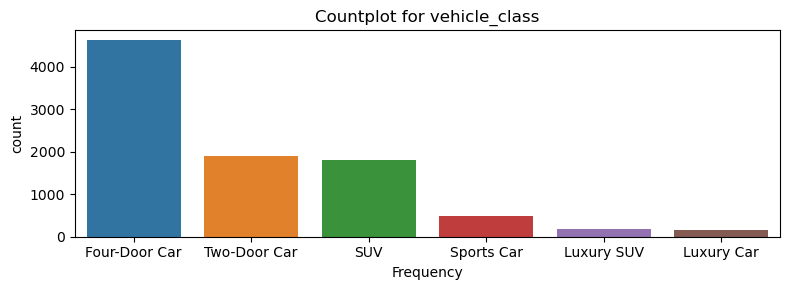

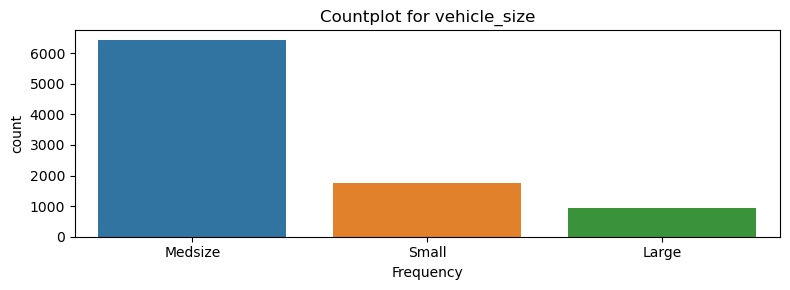

In [26]:
countplots(categorical_df)

policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [27]:
#drop column policy type and transform column policy into categorical of L1, L2, L3 wherever they are
categorical_df=categorical_df.drop(['policy_type'], axis=1)
categorical_df.head()



,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
def clean_policy_type (policy_type:str):
    '''
    This function takes the policy type and returns L1, L2, L3 wherever they are found and ignores the rest
    of the string
    '''
    if 'L1' in policy_type:
        return 'L1'
    elif 'L2' in policy_type:
        return 'L2'
    elif 'L3' in policy_type:
        return 'L3'
    else:
        return policy_type
    
    #apply function to policy column
categorical_df['policy']=categorical_df['policy'].apply(clean_policy_type)

#check if it worked
categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

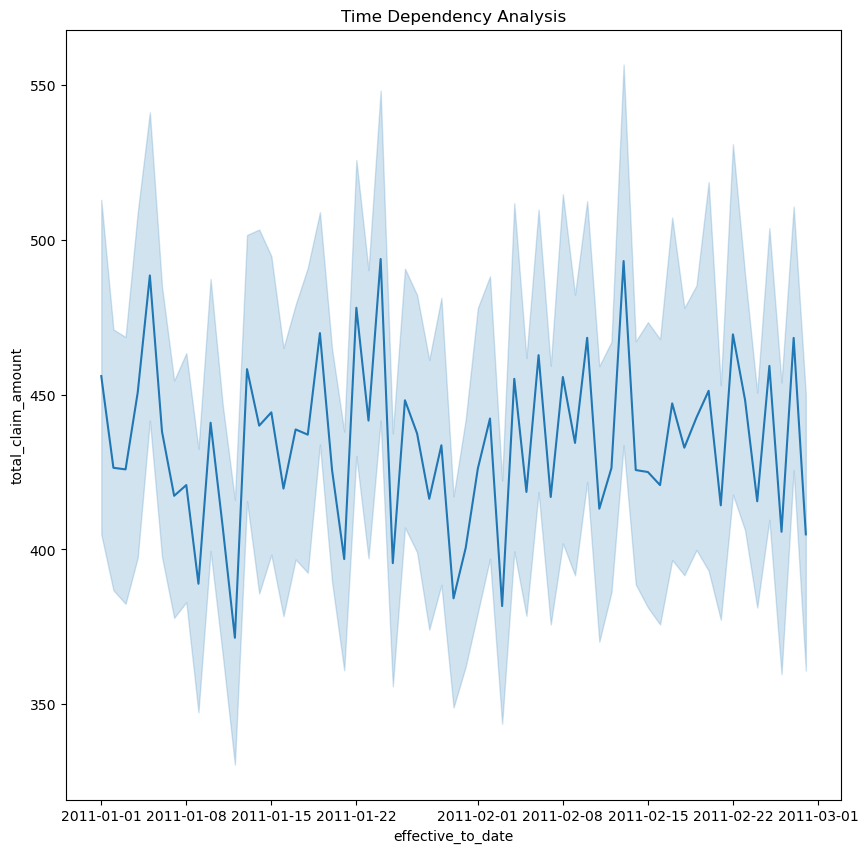

In [29]:
#use Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates.
plt.figure(figsize=(10, 10))
sns.lineplot(data=customer_df, x='effective_to_date', y='total_claim_amount')
plt.title('Time Dependency Analysis')
plt.show()

In [30]:
#efine an empty pandas DataFrame, and add the following new columns: month, day, week, day_name, total_claim_amount
time_df=pd.DataFrame()
time_df['day']=customer_df['effective_to_date'].dt.day
time_df['day_name']=customer_df['effective_to_date'].dt.day_name()
time_df['week']=customer_df['effective_to_date'].dt.week
time_df['month']=customer_df['effective_to_date'].dt.month_name()
time_df['total_claim_amount']=customer_df['total_claim_amount']
time_df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\2472789674.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  time_df['week']=customer_df['effective_to_date'].dt.week


,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [31]:
#Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)
total_target=time_df.groupby('day_name').sum()['total_claim_amount'].round(2)           
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']                                             
total_target=total_target.reindex(index=list_of_correct_days) 
display(total_target)


day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

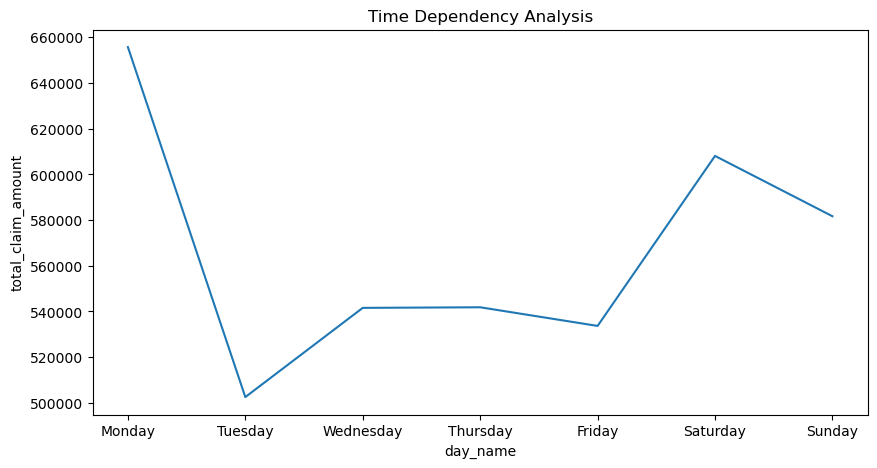

In [32]:
#use seaborn line plot for total_target
plt.figure(figsize=(10, 5))
sns.lineplot(data=total_target)
plt.title('Time Dependency Analysis')
plt.show()


there was a sharp decline in total claim amount on tuesday when compared to the previous day(monday). claims across till friday was fairly stable, before peaking on saturday

In [33]:
#Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
total_claims=time_df.groupby('day_name').count()['total_claim_amount']
total_claims=total_claims.reindex(index=list_of_correct_days)
display(total_claims)

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

In [34]:
#Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
median_target=time_df.groupby('day_name').median()['total_claim_amount'].round(2).sort_values(ascending=False)
display(median_target)


day_name
Thursday     395.33
Wednesday    392.24
Monday       385.74
Sunday       383.72
Saturday     379.20
Tuesday      378.49
Friday       371.80
Name: total_claim_amount, dtype: float64

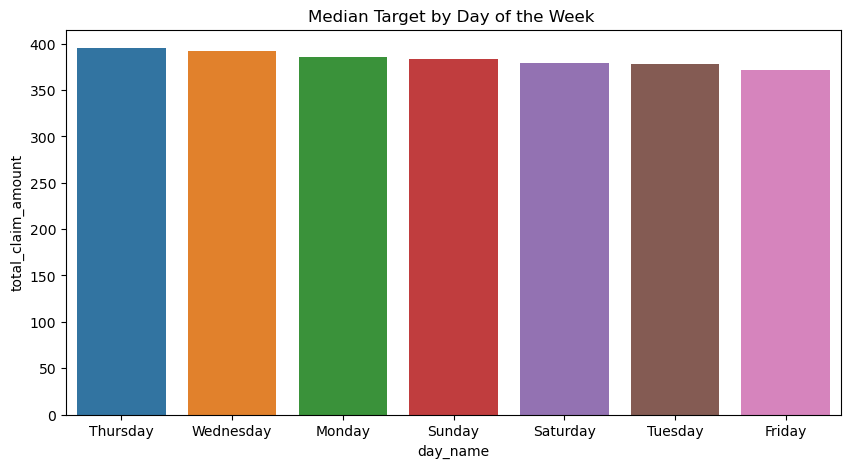

In [35]:
#Plot the median "target" by day of the week name using a seaborn barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=median_target.index, y=median_target)
plt.title('Median Target by Day of the Week ')
plt.show()

The median of the total_claim amount distribution were extremely similar, suggesting that a lot of claims were made fairly the same group of claimants. 

In [36]:
#see unique months in new_df
time_df['month'].unique() 

array(['February', 'January'], dtype=object)

In [37]:
total_target_month=time_df.groupby('month').sum()['total_claim_amount'].round(2)
display(total_target_month)

month
February    1847824.19
January     2117142.86
Name: total_claim_amount, dtype: float64

In [38]:
#Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
total_target_month=time_df.groupby('month').sum()['total_claim_amount'].round(2)
list_of_correct_values = ['January', 'February']
total_target_month=total_target_month.reindex(index=list_of_correct_values)
display(total_target_month)

month
January     2117142.86
February    1847824.19
Name: total_claim_amount, dtype: float64

it appears that we have data for only two groups.and there are no given values for the other month

In [39]:
#Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3)

def remove_outliers(df:pd.DataFrame, thr=3):
    '''
    The function takes a dataframe as input and returns a dataframe without outliers
    
    condition: the outliers are removed if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3)
    '''
    mean = df[column_name].mean()
    std = df[column_name].std()
    lower_bound = mean - thr * std
    upper_bound = mean + thr * std
    
    # Remove rows with values outside the specified threshold
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df



In [40]:
#call function for continuous_df
for column_name in continuous_df.columns:
    continuous_df = remove_outliers(continuous_df, thr=3)

#show continuous_df without outliers
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [41]:
#Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and time_df, drop total_claim_amount 
time_df=time_df.drop(['total_claim_amount'], axis=1)
conc_df=pd.concat([continuous_df, discrete_df, categorical_df, time_df], axis=1)
#show conc_df
conc_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February


In [42]:
conc_df.tail()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
9097,NaN,NaN,NaN,NaN,NaN,15,0,2,California,No,...,Single,L3,Offer4,Branch,Two-Door Car,Small,11,Friday,6,February
9103,NaN,NaN,NaN,NaN,NaN,24,0,4,California,No,...,Single,L3,Offer1,Agent,Luxury SUV,Large,1,Saturday,52,January
9109,NaN,NaN,NaN,NaN,NaN,23,0,1,California,No,...,Single,L3,Offer1,Branch,SUV,Medsize,25,Tuesday,4,January
9110,NaN,NaN,NaN,NaN,NaN,10,0,2,California,Yes,...,Married,L2,Offer2,Agent,Sports Car,Medsize,14,Friday,2,January
9125,NaN,NaN,NaN,NaN,NaN,26,0,2,California,No,...,Single,L3,Offer1,Agent,SUV,Small,31,Monday,5,January


In [43]:
#drop nan values rows and reset index
conc_df=conc_df.dropna().reset_index(drop=True)
#look for nan values
conc_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
day                              0
day_name                         0
week                             0
month                            0
dtype: int64

In [44]:
#check shape
conc_df.shape

(8575, 25)

In [45]:
conc_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month'],
      dtype='object')

In [46]:
#reorder columns and place total_claim_amount at the end

conc_df_order=['customer_lifetime_value', 'income', 'monthly_premium_auto','months_since_policy_inception','months_since_last_claim', 'number_of_open_complaints','number_of_policies', 'state', 'response', 'coverage', 'education','employmentstatus', 'gender', 'location_code', 'marital_status','policy', 'renew_offer_type', 'sales_channel', 'vehicle_class','vehicle_size', 'day', 'day_name', 'week', 'month','total_claim_amount']



In [47]:
conc_df=conc_df[conc_df_order]

In [48]:
conc_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


Turn the response column values into (Yes=1/No=0).

In [49]:
#turn response column into binary
conc_df['response']=conc_df['response'].apply(lambda x: 0 if x=='No' else 1)

In [50]:
conc_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [51]:
#check for education column
conc_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [52]:
#use lambda to group master and doctor into graduate 
conc_df['education']=conc_df['education'].apply(lambda x: 'Graduate' if x=='Master' or x=='Doctor' else x)

In [53]:
#verify if it worked
conc_df['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [54]:
#chek for employmentstatus column
conc_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [55]:
#use lambda to group medical leave, disabled and retired into inactive
conc_df['employmentstatus']=conc_df['employmentstatus'].apply(lambda x: 'Inactive' if x=='Medical Leave' or x=='Disabled' or x=='Retired' else x)

In [56]:
#verify if it worked
conc_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

Deal with column Gender turning the values into (1/0).

In [57]:
#check for gender column
conc_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [58]:
#turn gender column into binary , f as 1 and m as 0
conc_df['gender']=conc_df['gender'].apply(lambda x: 1 if x=='F' else 0)

In [59]:
#verify if it worked
conc_df['gender'].unique()

array([1, 0], dtype=int64)

Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [60]:
#group sports car, luxury suv, luxury car under vehicle_class column as luxury and leave the rest as they are
conc_df['vehicle_class']=conc_df['vehicle_class'].apply(lambda x: 'Luxury' if x=='Sports Car' or x=='Luxury SUV' or x=='Luxury Car' else x)

In [61]:
#verify if it worked
conc_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic

In [62]:
#encode coverage column taking the order premium>extended>basic
conc_df['coverage']=conc_df['coverage'].apply(lambda x: 1 if x=='Basic' else 2 if x=='Extended' else 3)

In [63]:
conc_df['coverage'].unique()

array([1, 2, 3], dtype=int64)

Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [64]:
conc_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [65]:
#encode employmentstatus column taking the order employed>inactive>unemployed
conc_df['employmentstatus']=conc_df['employmentstatus'].apply(lambda x: 1 if x=='Unemployed' else 2 if x=='Inactive' else 3)
#verify if it worked
conc_df['employmentstatus'].unique()

array([3, 1, 2], dtype=int64)

Encode the column location_code as: "Urban" > "Suburban" > "Rural".


In [66]:
#encode location_code column taking the order urban>rural>suburban
conc_df['location_code']=conc_df['location_code'].apply(lambda x: 1 if x=='Rural' else 2 if x=='Suburban' else 3)
#verify if it worked
conc_df['location_code'].unique()

array([2, 1, 3], dtype=int64)

Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [67]:
#encode vehicle_size column taking the order large>medsize>small
conc_df['vehicle_size']=conc_df['vehicle_size'].apply(lambda x: 1 if x=='Small' else 2 if x=='Medsize' else 3)
#verify if it worked    
conc_df['vehicle_size'].unique()

array([2, 1, 3], dtype=int64)

Get a dataframe with the categorical nominal columns

In [69]:
#Get a dataframe with the categorical nominal columns
categorical_nominal_df=conc_df[['state', 'response', 'education', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class','day_name', 'month']]

In [70]:
categorical_nominal_df.head()                                                                                           

,state,response,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name,month
0,Washington,0,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday,February
1,Arizona,0,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday,January
2,Nevada,0,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday,February
3,California,0,Bachelor,Married,L2,Offer1,Call Center,SUV,Thursday,January
4,Washington,0,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday,February


Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [71]:
#Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie: levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
levels = [list(categorical_nominal_df[col].unique()) for col in categorical_nominal_df.columns]
levels


[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 [0, 1],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday'],
 ['February', 'January']]

In [72]:
levels = []

for column_name in categorical_nominal_df.columns:
    unique_values = categorical_nominal_df[column_name].unique().tolist()
    levels.append(unique_values)



In [73]:
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 [0, 1],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday'],
 ['February', 'January']]

Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [74]:
from sklearn.preprocessing import OneHotEncoder

#Create a OneHotEncoder instance with the following parameters:  drop='first'
encoder = OneHotEncoder(drop='first', categories=levels)